# Prediction of House Prices in Nigeria

## Import

In [1]:
# Import the necassary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown

warnings.filterwarnings("ignore")

In [2]:
def wrangle(filepath):
    # Read CSV file    
    df = pd.read_csv(filepath)
    
    low, high = df["price"].quantile([0.1, 0.9])
    mask_price = df["price"].between(low, high)
    df = df[mask_price]
    
    # Drop multicollinearity feature
    df.drop(columns = ["bathrooms", "toilets"], inplace=True)
    
    return df

In [3]:
# Use this cell to test your wrangle function and explore the data
df = wrangle("nigeria_houses_data.csv")

In [4]:
df.head()

,bedrooms,parking_space,title,town,state,price
2,4.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19774 entries, 2 to 24325
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       19774 non-null  float64
 1   parking_space  19774 non-null  float64
 2   title          19774 non-null  object 
 3   town           19774 non-null  object 
 4   state          19774 non-null  object 
 5   price          19774 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,bedrooms,parking_space,price
count,19774.000000,19774.000000,1.977400e+04
mean,4.381815,4.047891,1.132978e+08
std,0.981735,1.347888,7.518446e+07
min,1.000000,1.000000,2.700000e+07
25%,4.000000,4.000000,6.000000e+07
50%,4.000000,4.000000,8.500000e+07
75%,5.000000,4.000000,1.450000e+08
max,9.000000,9.000000,3.500000e+08


## Exploratory Data Analysis (EDA)

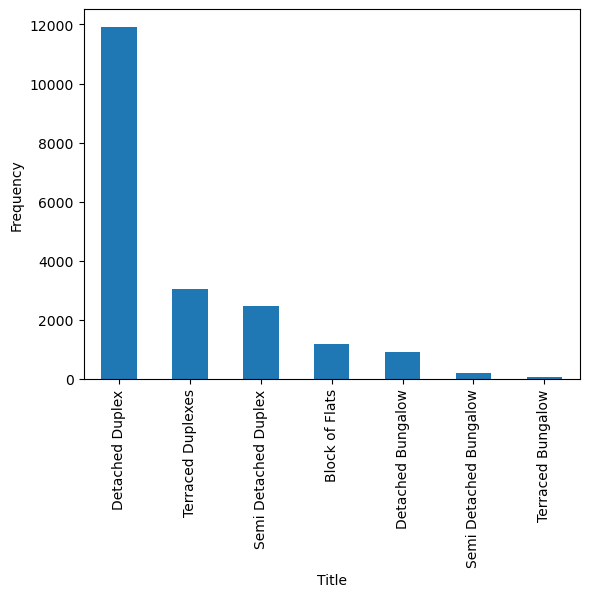

In [7]:
df["title"].value_counts().plot(
    kind="bar",
    xlabel="Title",
    ylabel="Frequency"
);

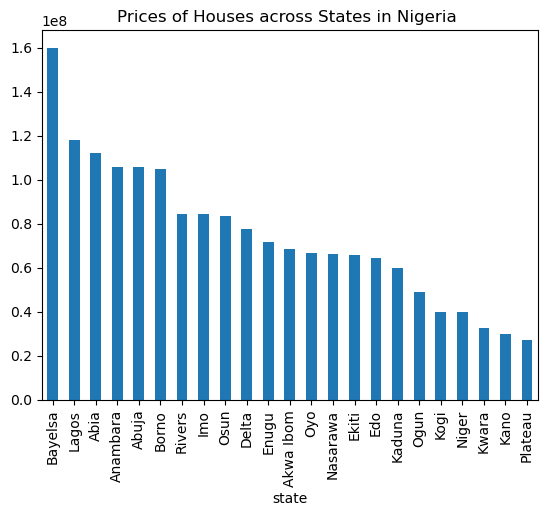

In [8]:
df.groupby("state")["price"].mean().sort_values(ascending=False).plot(
    kind="bar",
    title="Prices of Houses across States in Nigeria "
);

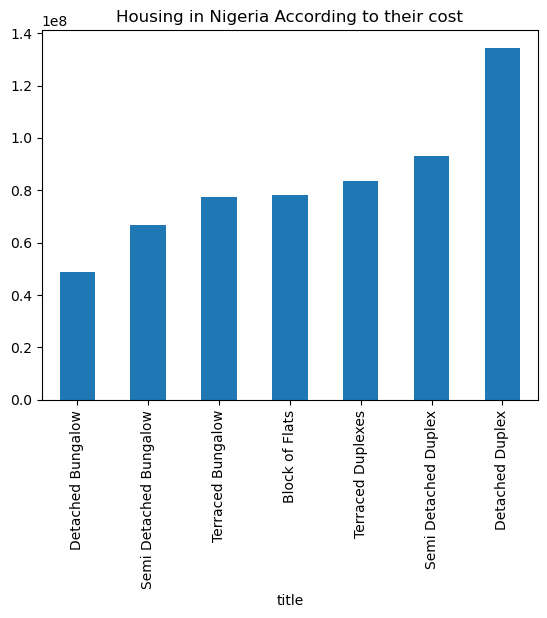

In [9]:
df.groupby("title")["price"].mean().sort_values().plot(
    kind="bar",
    title="Housing in Nigeria According to their cost"
);

<Axes: >

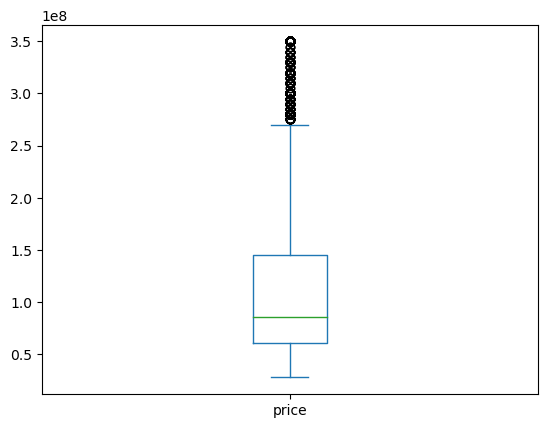

In [10]:
df["price"].plot(kind="box")

### Price Distribution

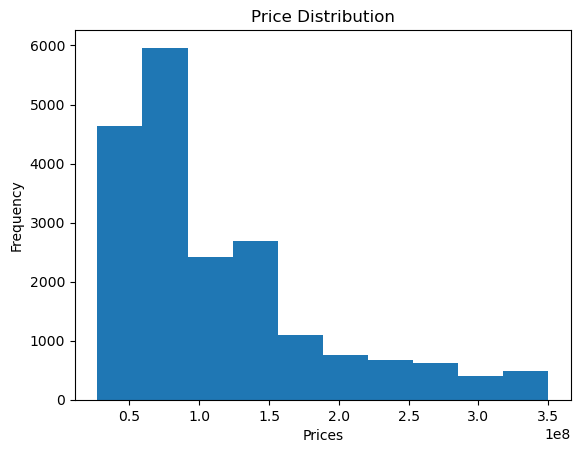

In [11]:
df["price"].plot(
    kind="hist", xlabel="Prices", title="Price Distribution"
);

### Heatmap

<Axes: >

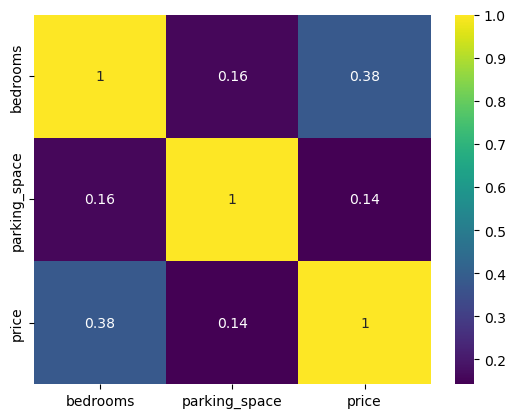

In [12]:
df_corr = df.select_dtypes("number").corr()
sns.heatmap(df_corr, annot=True, cmap="viridis")

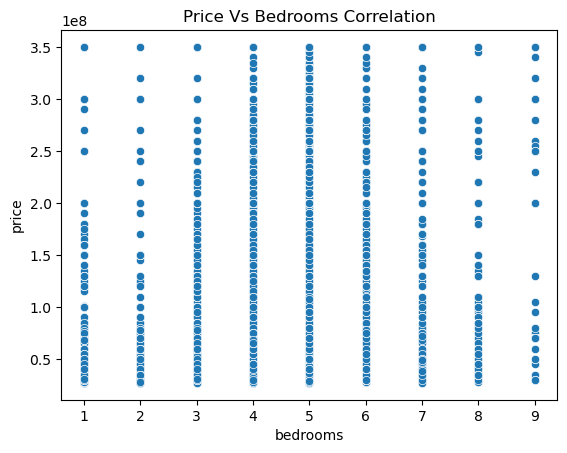

In [13]:
sns.scatterplot(x="bedrooms", y="price", data=df)
plt.title("Price Vs Bedrooms Correlation");

## Split the Data

In [14]:
features = ['bedrooms', 'parking_space', 'title', 'town', 'state']
target = "price"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Baseline Model

In [15]:
y_mean = y_train.mean().round(2)
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline).round(2)
print("Mean price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean price: 113130920.04
Baseline MAE: 58391690.6


### Linear Regression Model

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['title', 'state', 'town']),  # Categorical column
        ('num', StandardScaler(), ['bedrooms', 'parking_space'])    # Numerical column
    ]
)

model = make_pipeline(
    preprocessor,
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title', 'state', 'town']),
                                                 ('num', StandardScaler(),
                                                  ['bedrooms',
                                                   'parking_space'])])),
                ('linearregression', LinearRegression())])

### Evaluate the Model

In [17]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE Linear Regression:", round(mae_training, 2))

Training MAE Linear Regression: 41023201.51


In [18]:
y_test_pred = model.predict(X_test)
mae_testing = mean_absolute_error(y_test, y_test_pred)
print("Testing MAE Linear Regression:", round(mae_testing, 2))

Testing MAE Linear Regression: 42245452.54


## RANDOM FOREST ALGORITHM

In [19]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['title', 'state', 'town']),  # Categorical columns
        ('num', StandardScaler(), ['bedrooms', 'parking_space'])  # Numerical columns
    ]
)

# Create the pipeline
model_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=100, random_state=42) 
)

# Fit the model
model_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title', 'state', 'town']),
                                                 ('num', StandardScaler(),
                                                  ['bedrooms',
                                                   'parking_space'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### Evaluate the Random Forest Model


In [27]:
y_train_pred_rf = model_rf.predict(X_train)
mae_training = mean_absolute_error(y_train, y_train_pred_rf)
print("Training MAE Random Forest:", round(mae_training, 2))

Training MAE Random Forest: 32780041.6


In [28]:
y_test_pred_rf = model_rf.predict(X_test)
mae_testing = mean_absolute_error(y_test, y_test_pred_rf)
print("Testing MAE Random Forest:", round(mae_testing, 2))

Testing MAE Random Forest: 37201567.92


## COMMUNICATE THE MODEL RESULT

In [22]:
# Updated make_prediction function to handle the correct features: bedrooms, parking_space, title, town, state
def make_prediction(bedrooms, parking_space, title, town, state):
    # Create a dictionary with input data
    data = {
        "bedrooms": bedrooms,
        "parking_space": parking_space,
        "title": title,
        "town": town,
        "state": state
    }
    
    # Convert the input data to a DataFrame for prediction
    df = pd.DataFrame(data, index=[0])
    
    # Make the prediction using the trained model pipeline
    prediction = model_rf.predict(df).round(2)[0]
    
    # Return the prediction as a formatted string
    return f"Predicted apartment price: {prediction} Naira"

# Interactive widgets
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
    ),
    parking_space=IntSlider(
        min=X_train["parking_space"].min(),
        max=X_train["parking_space"].max(),
        value=X_train["parking_space"].mean(),
    ),
    title=Dropdown(
        options=sorted(X_train["title"].unique())
    ),
    town=Dropdown(
        options=sorted(X_train["town"].unique())
    ),
    state=Dropdown(
        options=sorted(X_train["state"].unique())
    ),
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=9, min=1), IntSlider(value=4, description…